# Projet : réaliser une étude sur les produits alimentaires

## 1 - Contexte

Vous réalisez une mission "UFC-Que Choisir". Cette association vous demande de réaliser une étude 
sur la qualité des produits alimentaires mis à disposition des consommateurs par les marques. Cette étude a vocation à aider les consommateurs dans leurs choix.

L'objectif est d'analyser les marques sur au moins les critères suivants : la qualité nutritionnelle, l'impact environnemental, la part des produits biologiques.


Pour cela, vous proposer d'utiliser les données de l'application Yuka

Voici une liste des questions que se pose l'association : 

- Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

- Quelles sont les marques qui ont le plus recours aux additifs nocifs

- Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

- Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

- Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

- Quelles sont les marques qui proposent essentiellement des produits biologiques ?

- Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 

- Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

- Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

- Quelles marques faut-il recommander ? 

- Quelles marques ne faut-il surtout pas recommander ? 




## 2 - Données

3 fichiers issues de l'application Yuka sont à exploiter pour réaliser l'analyse. 


Agriculture_biologique_final.csv

Qualite nutritionnelle_final.csv

Impact environnemental_final.csv

Voici le lien pour récupérer les fichiers

# https://www.dropbox.com/sh/pwsv4coi2sbbhyo/AABJ81-xWu3K2Cl0DOCmwbGsa?dl=0

## 3 - Consignes

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées


## 5 - Préparation de l'environnement

In [1]:
# Import de la librairie Pandas
import pandas as pd

# Import des librairies
import numpy as np
import scipy
import seaborn as sns

# Import de la librairie plotly
import plotly.express as px
import plotly.graph_objects as go

# Import de la librairie matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

pd.set_option("display.max_columns", None)
sns.set()

## 6 - A vous de jouer¶

Inspirez-vous du TP vu en cours

In [2]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)

In [3]:
#Les fonctions pour initialiser les DF

def bio_init():
    bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
    return bio
def env_init():
    env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
    return env
def quali_init():
    quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)
    return quali

### Nettoyage

In [4]:
env.drop(columns = "serving_size", inplace = True)
quali.drop(columns = "serving_size", inplace = True)
bio = bio.drop(columns = "serving_size")

In [5]:
quali = quali[quali.brands_tags.notna()]
quali = quali[quali.product_name.notna()]
quali['nutriscore_grade'].replace('unknown', np.NaN, inplace = True)
quali['nutriscore_grade'].replace('not-applicable', np.NaN, inplace = True)
env = env[env.brands_tags.notna()]
env = env[env.product_name.notna()]
env['ecoscore_grade'].replace('unknown', np.NaN, inplace = True)
env['ecoscore_grade'].replace('not-applicable', np.NaN, inplace = True)

In [6]:
bio

,product_name,brands_tags,est_bio
0,Skyr,danone,False
1,moutarde au moût de raisin,courte-paille,False
2,Solène céréales poulet,crous,False
3,Tarte noix de coco,"crous-resto,crous",False
4,Crème dessert chocolat,ferme-de-la-fremondiere,False
...,...,...,...
463917,Saveur ABRICIT,gerble,False
463918,Lindt pâte à tartiner,lindt,False
463919,Biodrink antioxydant pendant effort,punch-power,True
463920,miel de fleurs sauvage,miellerie-de-la-natouze,False


In [7]:
quali

,code,product_name,quantity,brands_tags,countries_tags,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.090,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.600,0.0
15,0000000001199,Solène céréales poulet,NaN,crous,en:france,https://images.openfoodfacts.org/images/produc...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.50,1.7,9.7,0.464,0.0
16,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,https://images.openfoodfacts.org/images/produc...,NaN,d,381.0,22.0,15.50,21.9,4.6,0.100,0.0
20,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,https://images.openfoodfacts.org/images/produc...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.00,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932792,998042,Saveur ABRICIT,NaN,gerble,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.130,0.0
932803,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932820,9995545314,Biodrink antioxydant pendant effort,NaN,punch-power,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,384.0,0.1,0.10,59.0,0.1,1.500,0.0
932823,9998110000007,miel de fleurs sauvage,NaN,miellerie-de-la-natouze,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [8]:
env.describe(include = "all")

,code,product_name,quantity,brands_tags,countries_tags,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
count,456563,456563,238003,456563,456563,411770,211996,456563,456563,456563
unique,424591,311711,21390,57779,1739,389617,5,2,2,2
top,3272320012507,Comté,500 g,carrefour,en:france,https://images.openfoodfacts.org/images/produc...,b,False,False,False
freq,3,468,10482,11664,408844,13,60331,372111,438237,452141


# Analyse des marques

### Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [9]:
nutriscore = quali[["brands_tags","product_name","nutriscore_grade"]]
nutriscore = nutriscore.groupby("brands_tags", as_index= False).count()

# Supprimer toutes les marques avec un échantillon de moins de 500 produits
ind = nutriscore[nutriscore["product_name"] <500].index
nutriscore.drop(ind, inplace = True)

# Créer une colonne ratio 
nutriscore["ratio nutriscore"] = nutriscore["nutriscore_grade"]/nutriscore["product_name"]*100

# Trier les marques qui affichent le plus leur nutriscore
nutriscore.sort_values("ratio nutriscore", ascending = False).head(5)

,brands_tags,product_name,nutriscore_grade,ratio nutriscore
54551,"u-saveurs,u",507,447,88.165680
4126,belle-france,1669,1402,84.002397
8705,"carrefour-bio,carrefour",540,453,83.888889
28505,la-nouvelle-agriculture,1112,884,79.496403
21706,grand-jury,665,521,78.345865


In [10]:
# on trie les marques qui affichent le moins le nutriscore
nutriscore.sort_values("ratio nutriscore", ascending = False).tail(5)

,brands_tags,product_name,nutriscore_grade,ratio nutriscore
34726,maggi,635,117,18.425197
39096,myprotein,1187,216,18.197136
47524,sainte-lucie,535,80,14.953271
15603,ducros,709,64,9.026798
42113,palais-des-thes,1029,50,4.859086


### Quelles sont les marques qui ont le plus recours aux additifs nocifs ?

In [11]:
nocifs_marque = quali.groupby(["brands_tags"]).agg({'nb_nocif':"sum"}).sort_values('nb_nocif', ascending=False)
nocifs_marque.head(10)

,nb_nocif
brands_tags,
sodastream,29.0
"nestle,sveltesse",10.0
a-rom,9.0
dove,8.0
nestle,7.0
schweppes,7.0
freeway,6.0
"sveltesse,nestle",5.0
leader-price,5.0


In [12]:
#on crée deux colonnes : une pour les produit avec additif "nb_nocif_1" et l'autre sans additif "nb_nocif_0"
quali["nb_nocif_1"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 1]
quali["nb_nocif_0"] = quali["nb_nocif"].loc[quali["nb_nocif"] == 0]

In [13]:
nocif = quali[["brands_tags","product_name","nb_nocif_1","nb_nocif_0"]]
nocif = nocif.groupby("brands_tags").count()

# on supprime toutes les marques avec un échantillon de moins de 500 produits
ind2 = nocif[nocif["product_name"] <500].index
nocif.drop(ind2, inplace = True)

nocif["ratio_1"] = nocif["nb_nocif_1"]/nocif["product_name"]*100


nocif.sort_values("ratio_1", ascending = False).head(10)

,product_name,nb_nocif_1,nb_nocif_0,ratio_1
brands_tags,,,,
eco,633,4,629,0.631912
migros,575,3,572,0.521739
le-comptoir-de-mathilde,758,3,755,0.395778
sans-marque,677,2,675,0.295421
nestle,2794,7,2787,0.250537
sainte-lucie,535,1,534,0.186916
lucien-georgelin,580,1,579,0.172414
dia,789,1,788,0.126743
leclerc,1771,2,1769,0.112931


### Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

In [14]:
nutriscore2 = quali.pivot_table(index="brands_tags", columns =["nutriscore_grade"], values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)

# Supprimer la ligne "All"
nutriscore2.drop("All", axis=0, inplace=True)

# on supprime toutes les marques avec un échantillon de moins de 500 produits avec un nurtiscore
# filtrer à 500 sur le product_name 
ind2 = nutriscore2[nutriscore2["All"] <500].index
nutriscore2.drop(ind2, inplace = True)

# on remplace les NaN par la valeur 0
nutriscore2 = nutriscore2.fillna(0)
nutriscore2

nutriscore_grade,a,b,c,d,e,All
brands_tags,,,,,,
andros,249.0,40.0,150.0,48.0,37.0,524
auchan,1669.0,1081.0,1484.0,1826.0,964.0,7024
belle-france,257.0,185.0,335.0,373.0,252.0,1402
"bio-village,marque-repere",187.0,107.0,108.0,134.0,64.0,600
bjorg,180.0,147.0,71.0,94.0,36.0,528
bonduelle,486.0,104.0,35.0,2.0,0.0,627
bonne-maman,14.0,14.0,162.0,189.0,149.0,528
carrefour,1294.0,944.0,1314.0,1884.0,1051.0,6487
casino,695.0,531.0,744.0,869.0,449.0,3288


In [15]:
#scoring
scores_nutri = {"a":5, "b":4, "c":3, "d":2, "e":1}
nutriscore2['score_total_marque'] = nutriscore2[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_nutri)), axis=1)
nutriscore2

nutriscore_grade,a,b,c,d,e,All,score_total_marque
brands_tags,,,,,,,
andros,249.0,40.0,150.0,48.0,37.0,524,1988.0
auchan,1669.0,1081.0,1484.0,1826.0,964.0,7024,21737.0
belle-france,257.0,185.0,335.0,373.0,252.0,1402,4028.0
"bio-village,marque-repere",187.0,107.0,108.0,134.0,64.0,600,2019.0
bjorg,180.0,147.0,71.0,94.0,36.0,528,1925.0
bonduelle,486.0,104.0,35.0,2.0,0.0,627,2955.0
bonne-maman,14.0,14.0,162.0,189.0,149.0,528,1139.0
carrefour,1294.0,944.0,1314.0,1884.0,1051.0,6487,19007.0
casino,695.0,531.0,744.0,869.0,449.0,3288,10018.0


In [16]:
nutriscore2 ['ratio_a'] = nutriscore2["a"] / nutriscore2["All"] * 100
nutriscore2 ['ratio_e'] = nutriscore2["e"] / nutriscore2["All"] * 100
#nutriscore2 ['ratio_score_total_marque'] = nutriscore2["score_total_marque"] / nutriscore2["score_total_marque"].sum() * 100
nutriscore2 ['ratio_score_total_marque'] = nutriscore2["score_total_marque"] / nutriscore2["All"].sum() * 100

In [17]:
# Marque avec le plus grand de produits noté A sur l'ensemble de ses produits affichant le nutriscore 
nutriscore2.sort_values("ratio_a", ascending = False).head(5)

nutriscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
bonduelle,486.0,104.0,35.0,2.0,0.0,627,2955.0,77.511962,0.000000,5.706175
la-nouvelle-agriculture,560.0,260.0,27.0,32.0,5.0,884,3990.0,63.348416,0.565611,7.704785
charal,300.0,103.0,75.0,64.0,1.0,543,2266.0,55.248619,0.184162,4.375700
andros,249.0,40.0,150.0,48.0,37.0,524,1988.0,47.519084,7.061069,3.838875
bjorg,180.0,147.0,71.0,94.0,36.0,528,1925.0,34.090909,6.818182,3.717221


In [18]:
# Marque avec le plus grand de produits noté E sur l'ensemble de ses produits affichant le nutriscore 
nutriscore2.sort_values("ratio_e", ascending = False).head(5)

nutriscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
nestle,68.0,96.0,296.0,230.0,350.0,1040,2422.0,6.538462,33.653846,4.676940
labeyrie,0.0,12.0,36.0,360.0,189.0,597,1065.0,0.000000,31.658291,2.056540
leclerc,29.0,53.0,125.0,253.0,193.0,653,1431.0,4.441041,29.555896,2.763295
bonne-maman,14.0,14.0,162.0,189.0,149.0,528,1139.0,2.651515,28.219697,2.199436
marks-spencer,164.0,134.0,184.0,191.0,166.0,839,2456.0,19.547080,19.785459,4.742595


In [19]:
# Marque avec le meilleur scoring 
best_scoring_nutriscore = nutriscore2.iloc[1:].sort_values("ratio_score_total_marque", ascending = False).head(6)
best_scoring_nutriscore

nutriscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
auchan,1669.0,1081.0,1484.0,1826.0,964.0,7024,21737.0,23.761390,13.724374,41.974665
carrefour,1294.0,944.0,1314.0,1884.0,1051.0,6487,19007.0,19.947587,16.201634,36.702970
u,977.0,728.0,935.0,1226.0,655.0,4521,13709.0,21.610263,14.487945,26.472406
casino,695.0,531.0,744.0,869.0,449.0,3288,10018.0,21.137470,13.655718,19.344997
leader-price,529.0,498.0,720.0,849.0,522.0,3118,9017.0,16.966004,16.741501,17.412042
picard,635.0,408.0,491.0,514.0,126.0,2174,7434.0,29.208832,5.795768,14.355231


### Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

In [20]:
écoscore = env[["brands_tags","product_name","ecoscore_grade"]]
écoscore = écoscore.groupby(["brands_tags"]).agg({'product_name':"count", "ecoscore_grade":"count"})

# Supprimer toutes les marques avec un échantillon de moins de 500 produits
ind = écoscore[écoscore["product_name"] <500].index
écoscore.drop(ind, inplace = True)

# Créer une colonne ratio 
écoscore["ratio écoscore"] = écoscore["ecoscore_grade"]/écoscore["product_name"]*100

# Trier les marques qui affichent le plus leur nutriscore
écoscore.sort_values("ratio écoscore", ascending = False).head(5)

,product_name,ecoscore_grade,ratio écoscore
brands_tags,,,
la-nouvelle-agriculture,1112,942,84.712230
belle-france,1669,1343,80.467346
"carrefour-bio,carrefour",540,431,79.814815
le-gaulois,2489,1937,77.822419
delpeyrat,663,499,75.263952


In [21]:
écoscore.sort_values("ratio écoscore", ascending = False).tail(5)

,product_name,ecoscore_grade,ratio écoscore
brands_tags,,,
knorr,1252,227,18.130990
prozis,653,62,9.494640
maggi,635,49,7.716535
palais-des-thes,1029,69,6.705539
myprotein,1187,67,5.644482


### Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

In [22]:
ecoscore2 = env.pivot_table(index="brands_tags", columns ="ecoscore_grade", values = "product_name", aggfunc ={"product_name" : "count"}, margins=True)

# Supprimer la ligne "All"
ecoscore2.drop("All", axis=0, inplace=True)

# on supprime toutes les marques avec un échantillon de moins de 500 produits avec un nurtiscore
# filtrer à 500 sur le product_name 
ind3 = ecoscore2[ecoscore2["All"] <500].index
ecoscore2.drop(ind3, inplace = True)

# on remplace les NaN par la valeur 0
ecoscore2 = ecoscore2.fillna(0)
ecoscore2

ecoscore_grade,a,b,c,d,e,All
brands_tags,,,,,,
auchan,379.0,1825.0,1258.0,1768.0,1254.0,6484
belle-france,64.0,437.0,278.0,337.0,227.0,1343
"bio-village,marque-repere",91.0,271.0,140.0,71.0,23.0,596
bonne-maman,33.0,124.0,165.0,176.0,29.0,527
carrefour,411.0,1641.0,1277.0,1889.0,1325.0,6543
casino,174.0,851.0,636.0,763.0,490.0,2914
cora,97.0,597.0,441.0,608.0,429.0,2172
delhaize,31.0,222.0,129.0,208.0,107.0,697
dia,37.0,173.0,132.0,123.0,72.0,537


In [23]:
#scoring
scores_eco = {"a":5, "b":4, "c":3, "d":2, "e":1}
ecoscore2['score_total_marque'] = ecoscore2[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_eco)), axis=1)
ecoscore2

ecoscore_grade,a,b,c,d,e,All,score_total_marque
brands_tags,,,,,,,
auchan,379.0,1825.0,1258.0,1768.0,1254.0,6484,17759.0
belle-france,64.0,437.0,278.0,337.0,227.0,1343,3803.0
"bio-village,marque-repere",91.0,271.0,140.0,71.0,23.0,596,2124.0
bonne-maman,33.0,124.0,165.0,176.0,29.0,527,1537.0
carrefour,411.0,1641.0,1277.0,1889.0,1325.0,6543,17553.0
casino,174.0,851.0,636.0,763.0,490.0,2914,8198.0
cora,97.0,597.0,441.0,608.0,429.0,2172,5841.0
delhaize,31.0,222.0,129.0,208.0,107.0,697,1953.0
dia,37.0,173.0,132.0,123.0,72.0,537,1591.0


In [24]:
ecoscore2 ['ratio_a'] = ecoscore2["a"] / ecoscore2["All"] * 100
ecoscore2 ['ratio_e'] = ecoscore2["e"] / ecoscore2["All"] * 100
#ecoscore2 ['ratio_score_total_marque'] = ecoscore2["score_total_marque"] / ecoscore2["score_total_marque"].sum() * 100
ecoscore2 ['ratio_score_total_marque'] = ecoscore2["score_total_marque"] / ecoscore2["All"].sum() * 100

In [25]:
# Marque avec le plus grand de produits noté A sur l'ensemble de ses produits affichant le nutriscore 
ecoscore2.sort_values("ratio_a", ascending = False).head(5)

ecoscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
"bio-village,marque-repere",91.0,271.0,140.0,71.0,23.0,596,2124.0,15.268456,3.859060,4.851309
u,401.0,1147.0,1156.0,905.0,605.0,4214,12476.0,9.515899,14.356906,28.495729
la-vie-claire,94.0,584.0,257.0,194.0,92.0,1221,4057.0,7.698608,7.534808,9.266365
dia,37.0,173.0,132.0,123.0,72.0,537,1591.0,6.890130,13.407821,3.633913
carrefour,411.0,1641.0,1277.0,1889.0,1325.0,6543,17553.0,6.281522,20.250650,40.091819


In [26]:
# Marque avec le plus grand de produits noté E sur l'ensemble de ses produits affichant le nutriscore 
ecoscore2.sort_values("ratio_e", ascending = False).head(5)

ecoscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
haribo,0.0,27.0,3.0,22.0,457.0,509,618.0,0.000000,89.783890,1.411539
labeyrie,1.0,13.0,40.0,170.0,377.0,601,894.0,0.166389,62.728785,2.041935
le-gaulois,1.0,24.0,263.0,1016.0,633.0,1937,3555.0,0.051626,32.679401,8.119775
fleury-michon,11.0,98.0,169.0,341.0,279.0,898,1915.0,1.224944,31.069042,4.373944
nestle,24.0,190.0,163.0,119.0,149.0,645,1756.0,3.720930,23.100775,4.010781


In [27]:
# Marque avec le meilleur scoring 
best_scoring_ecoscore = ecoscore2.iloc[1:].sort_values("ratio_score_total_marque", ascending = False).head(6)
best_scoring_ecoscore

ecoscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
carrefour,411.0,1641.0,1277.0,1889.0,1325.0,6543,17553.0,6.281522,20.250650,40.091819
u,401.0,1147.0,1156.0,905.0,605.0,4214,12476.0,9.515899,14.356906,28.495729
casino,174.0,851.0,636.0,763.0,490.0,2914,8198.0,5.971174,16.815374,18.724590
leader-price,162.0,788.0,566.0,826.0,478.0,2820,7790.0,5.744681,16.950355,17.792700
cora,97.0,597.0,441.0,608.0,429.0,2172,5841.0,4.465930,19.751381,13.341099
monoprix,79.0,391.0,309.0,559.0,311.0,1649,4315.0,4.790782,18.859915,9.855648


In [30]:
# best_scoring_ecoscore.plot.bar(title="Top 5 marques au Ecoscore")

### Quelles sont les marques qui proposent essentiellement des produits biologiques ?

In [31]:
corré_bio_quali_nutri = pd.merge(bio,quali, on = ['brands_tags','product_name'], how= 'inner', indicator = True)
corré_bio_quali_nutri

,product_name,brands_tags,est_bio,code,quantity,countries_tags,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nb_nocif_1,nb_nocif_0,_merge
0,Skyr,danone,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,0.0,both
1,Skyr,danone,False,03414569,NaN,en:france,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,en:lactic-fer...",a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,NaN,0.0,both
2,Skyr,danone,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,fr:ferments-l...",NaN,NaN,0.2,NaN,3.9,10.0,0.09,0.0,NaN,0.0,both
3,Skyr,danone,False,1033097270864,4,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,both
4,Skyr,danone,False,3033491270864,2 x 140 g,"en:france,en:switzerland",https://images.openfoodfacts.org/images/produc...,"en:skimmed-milk,en:dairy,en:milk,en:lactic-fer...",a,57.0,0.2,0.10,3.9,10.0,0.10,0.0,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970490,Nutra'cake framboise,delical,False,996299394093,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,381.0,12.7,6.70,29.0,15.6,0.80,0.0,NaN,0.0,both
970491,Chocolat noir patissier,monoprix-bio,True,997046,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.00,0.0,NaN,0.0,both
970492,Saveur ABRICIT,gerble,False,998042,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.13,0.0,NaN,0.0,both
970493,Lindt pâte à tartiner,lindt,False,9990000,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,both


In [32]:
# Création de ma table de contingence
X = "nutriscore_grade"
Y = "est_bio"

cont_1 = corré_bio_quali_nutri[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

est_bio,False,True,Total
nutriscore_grade,,,
a,132767,16158,148925
b,81011,8539,89550
c,96270,11545,107815
d,129636,14307,143943
e,65480,7027,72507
Total,505164,57576,562740


In [33]:
# Regardons la distribution si les variables étaient complétement independantes

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(corré_bio_quali_nutri[[X,Y]].dropna())
indep = round(tx.dot(ty) / n)
indep

est_bio,False,True,Total
nutriscore_grade,,,
a,133688.0,15237.0,148925.0
b,80388.0,9162.0,89550.0
c,96784.0,11031.0,107815.0
d,129216.0,14727.0,143943.0
e,65089.0,7418.0,72507.0
Total,505164.0,57576.0,562740.0


In [34]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [35]:
chi2, p, dof, expected_freq= chi2_contingency(cont_1)
chi2

172.2854459132039

In [36]:
p

9.327222715878854e-32

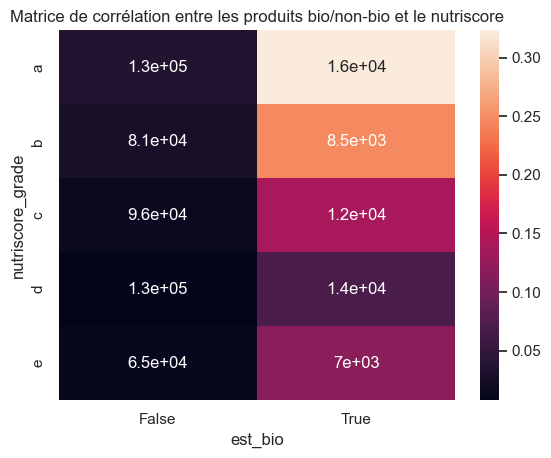

In [37]:
import seaborn as sns

c = cont_1.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre les produits bio/non-bio et le nutriscore')
plt.show()

In [39]:
# import plotly.express as px
# fig = px.scatter(corré_bio_quali_nutri, x="nutriscore_grade", y="est_bio")
# fig.show()

### Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

In [42]:
corré_bio_env = pd.merge(bio,env, on = ['brands_tags','product_name'], how= 'inner', indicator = True)
corré_bio_env

,product_name,brands_tags,est_bio,code,quantity,countries_tags,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa,_merge
0,Skyr,danone,False,00000000000026772226,480 g,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,both
1,Skyr,danone,False,03414569,NaN,en:france,https://images.openfoodfacts.org/images/produc...,b,False,False,False,both
2,Skyr,danone,False,04319111,825 g,en:france,https://images.openfoodfacts.org/images/produc...,NaN,True,False,False,both
3,Skyr,danone,False,1033097270864,4,en:france,NaN,d,False,False,False,both
4,Skyr,danone,False,3033491270864,2 x 140 g,"en:france,en:switzerland",https://images.openfoodfacts.org/images/produc...,b,True,False,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...
970490,Nutra'cake framboise,delical,False,996299394093,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
970491,Chocolat noir patissier,monoprix-bio,True,997046,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
970492,Saveur ABRICIT,gerble,False,998042,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
970493,Lindt pâte à tartiner,lindt,False,9990000,NaN,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both


In [43]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "est_bio"

cont_2 = corré_bio_env[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_2

est_bio,False,True,Total
ecoscore_grade,,,
a,13545,6249,19794
b,65416,20511,85927
c,67860,11630,79490
d,238178,13387,251565
e,88525,4068,92593
Total,473524,55845,529369


In [44]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_2.loc[:,["Total"]]
ty = cont_2.loc[["Total"],:]
n = len(corré_bio_env[[X,Y]].dropna())
indep2 = round(tx.dot(ty) / n)
indep2

est_bio,False,True,Total
ecoscore_grade,,,
a,17706.0,2088.0,19794.0
b,76862.0,9065.0,85927.0
c,71104.0,8386.0,79490.0
d,225027.0,26538.0,251565.0
e,82825.0,9768.0,92593.0
Total,473524.0,55845.0,529369.0


In [45]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [46]:
chi2, p, dof, expected_freq= chi2_contingency(cont_2)
chi2

37834.452049527885

In [47]:
p

0.0

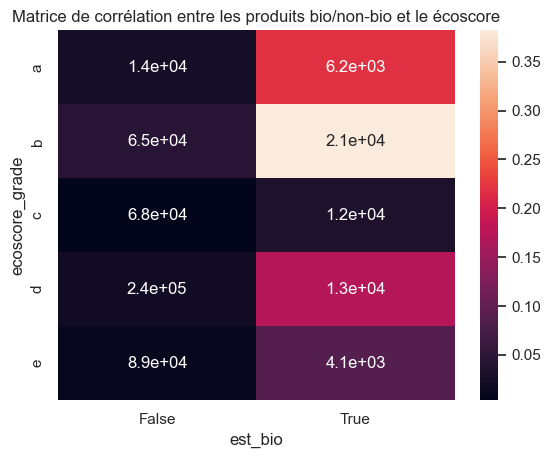

In [48]:
import seaborn as sns

c = cont_2.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep2)**2/indep2
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre les produits bio/non-bio et le écoscore')
plt.show()

### Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspect envionnemental ?

In [49]:
corré_quali_nutri_env = pd.merge(quali,env, on = ['code'], how= 'inner', indicator = True)
corré_quali_nutri_env

,code,product_name_x,quantity_x,brands_tags_x,countries_tags_x,image_url_x,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nb_nocif_1,nb_nocif_0,product_name_y,quantity_y,brands_tags_y,countries_tags_y,image_url_y,ecoscore_grade,est_plastique,est_palm,est_cocoa,_merge
0,00000000000026772226,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.090,0.0,NaN,0.0,Skyr,480 g,danone,en:france,https://images.openfoodfacts.org/images/produc...,d,False,False,False,both
1,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.600,0.0,NaN,0.0,moutarde au moût de raisin,100g,courte-paille,en:france,https://images.openfoodfacts.org/images/produc...,c,False,False,False,both
2,0000000001199,Solène céréales poulet,NaN,crous,en:france,https://images.openfoodfacts.org/images/produc...,"en:antioxidant,en:colour,en:tomato,en:vegetabl...",NaN,219.0,5.9,0.50,1.7,9.7,0.464,0.0,NaN,0.0,Solène céréales poulet,NaN,crous,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
3,0000000001281,Tarte noix de coco,NaN,"crous-resto,crous",en:france,https://images.openfoodfacts.org/images/produc...,NaN,d,381.0,22.0,15.50,21.9,4.6,0.100,0.0,NaN,0.0,Tarte noix de coco,NaN,"crous-resto,crous",en:france,https://images.openfoodfacts.org/images/produc...,NaN,True,False,False,both
4,0000000001663,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,https://images.openfoodfacts.org/images/produc...,"en:whole-milk,en:dairy,en:milk,en:sugar,en:add...",NaN,0.0,0.0,0.00,0.0,0.0,0.000,0.0,NaN,0.0,Crème dessert chocolat,NaN,ferme-de-la-fremondiere,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524156,99665555,La parisienne à poêler,NaN,bonduelle,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,52.0,0.6,0.10,2.1,1.7,0.470,0.0,NaN,0.0,La parisienne à poêler,NaN,bonduelle,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
524157,997046,Chocolat noir patissier,NaN,monoprix-bio,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.000,0.0,NaN,0.0,Chocolat noir patissier,NaN,monoprix-bio,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
524158,998042,Saveur ABRICIT,NaN,gerble,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.130,0.0,NaN,0.0,Saveur ABRICIT,NaN,gerble,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both
524159,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,Lindt pâte à tartiner,NaN,lindt,en:france,https://images.openfoodfacts.org/images/produc...,NaN,False,False,False,both


In [51]:
# Création de ma table de contingence
X = "ecoscore_grade"
Y = "nutriscore_grade"

cont_3 = corré_quali_nutri_env[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,4214,2382,2435,1579,241,10851
b,13376,7606,12038,13176,3120,49316
c,4460,4502,10213,13299,6672,39146
d,3536,5791,11956,17638,11265,50186
e,2623,4052,4212,11467,11392,33746
Total,28209,24333,40854,57159,32690,183245


In [52]:
# Regardons la distibution si les variables étaient complétement independantes

tx = cont_3.loc[:,["Total"]]
ty = cont_3.loc[["Total"],:]
n = len(corré_quali_nutri_env[[X,Y]].dropna())
indep3 = round(tx.dot(ty) / n)
indep3

nutriscore_grade,a,b,c,d,e,Total
ecoscore_grade,,,,,,
a,1670.0,1441.0,2419.0,3385.0,1936.0,10851.0
b,7592.0,6549.0,10995.0,15383.0,8798.0,49316.0
c,6026.0,5198.0,8727.0,12211.0,6983.0,39146.0
d,7726.0,6664.0,11189.0,15654.0,8953.0,50186.0
e,5195.0,4481.0,7524.0,10526.0,6020.0,33746.0
Total,28209.0,24333.0,40854.0,57159.0,32690.0,183245.0


In [53]:
# importons le module chi2_contingency de la librairie scipy pour faire un chi2
from scipy.stats import chi2_contingency as chi2_contingency

In [54]:
chi2, p, dof, expected_freq= chi2_contingency(cont_3)
chi2

27393.712838390493

In [55]:
p

0.0

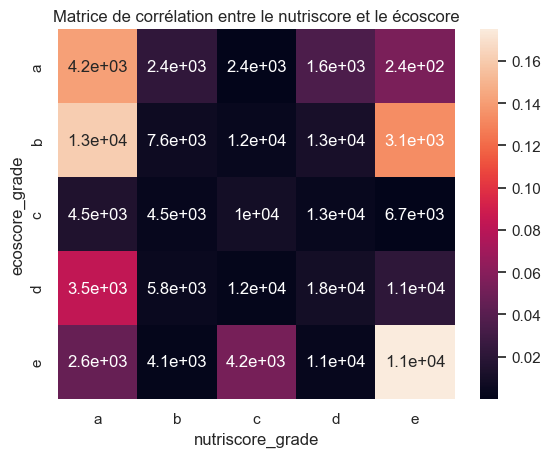

In [56]:
import seaborn as sns

c = cont_3.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep3)**2/indep3
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.title('Matrice de corrélation entre le nutriscore et le écoscore')
plt.show()

### Quelles marques faut-il recommander ?

In [ ]:
# Déterminons nos paramètres pour définir quelles marques recommandées
# 50% de la note tient compte du Scoring nurtri
# 30% de la note tient compte du Scoring éco
# 10% de la note tient compte du Bio 
# 10% de la note tient compte des additifs nocifs

In [57]:
best_scoring_nutriscore

nutriscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
auchan,1669.0,1081.0,1484.0,1826.0,964.0,7024,21737.0,23.761390,13.724374,41.974665
carrefour,1294.0,944.0,1314.0,1884.0,1051.0,6487,19007.0,19.947587,16.201634,36.702970
u,977.0,728.0,935.0,1226.0,655.0,4521,13709.0,21.610263,14.487945,26.472406
casino,695.0,531.0,744.0,869.0,449.0,3288,10018.0,21.137470,13.655718,19.344997
leader-price,529.0,498.0,720.0,849.0,522.0,3118,9017.0,16.966004,16.741501,17.412042
picard,635.0,408.0,491.0,514.0,126.0,2174,7434.0,29.208832,5.795768,14.355231


In [58]:
best_scoring_ecoscore

ecoscore_grade,a,b,c,d,e,All,score_total_marque,ratio_a,ratio_e,ratio_score_total_marque
brands_tags,,,,,,,,,,
carrefour,411.0,1641.0,1277.0,1889.0,1325.0,6543,17553.0,6.281522,20.250650,40.091819
u,401.0,1147.0,1156.0,905.0,605.0,4214,12476.0,9.515899,14.356906,28.495729
casino,174.0,851.0,636.0,763.0,490.0,2914,8198.0,5.971174,16.815374,18.724590
leader-price,162.0,788.0,566.0,826.0,478.0,2820,7790.0,5.744681,16.950355,17.792700
cora,97.0,597.0,441.0,608.0,429.0,2172,5841.0,4.465930,19.751381,13.341099
monoprix,79.0,391.0,309.0,559.0,311.0,1649,4315.0,4.790782,18.859915,9.855648


### Quelles marques ne faut-il surtout pas recommander ?